This code was completely designed by [Shelly Leal](https://www.linkedin.com/in/shelly-leal/). 

**Please refer to the author in case you are intend to reuse the sample.**

Source of data: https://data.world/ian/ramen-ratings



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import re

Import the data from Github:

In [89]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ShellyLeal/Top-10-Noodle-Prediction/main/The%20Ramen%20Rater.csv", sep =';')

Preprocessing the data. Some columns are not numeric yet. The Top Ten column needs to be formatted to remove the year information as an input for the final model:

In [90]:
df['Top Ten'] = df['Top Ten'].fillna(0)
df[df['Top Ten'].notnull()].head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2750,Nissin,Cup Noodles Tom Yum Goong Flavour Potato Chips,Pack,Hong Kong,5,0
1,2749,Maruchan,Bariuma Goboten Udon,Bowl,Japan,0,0
2,2748,MyKuali,Penang Red Tom Yum Goong Noodle (2018 Recipe),Pack,Malaysia,5,0
3,2747,Nissin,Cup Noodles Kyushu White Flavour (Open Sesame),Cup,Singapore,"3,5",0
4,2746,Ve Wong,Fried Noodles With Mexican Chili Flavor,Pack,Taiwan,"4,25",0


In [91]:
df['Top Ten'] = df['Top Ten'].astype(str)
df['Top Ten'] = df['Top Ten'].apply(lambda x: x.replace('\n','0'))
df[df['Top Ten']!= '0'].head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
786,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5,2016 #10
803,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5,2016 #1
825,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5,2016 #8
843,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5,2016 #5
922,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5,2016 #9


At this point there are new columns, Top year and Top Number (1 to 10, or 0 if not won) generated based on Top Ten column:

In [92]:
df['Top year'] = df['Top Ten'].apply(lambda x: x[:4])
df['Top number'] = df['Top Ten'].apply(lambda x: x[-2:].replace('#',''))
df[df['Top year']!= '0'].head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Top year,Top number
786,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5,2016 #10,2016,10
803,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5,2016 #1,2016,1
825,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5,2016 #8,2016,8
843,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5,2016 #5,2016,5
922,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5,2016 #9,2016,9


Some quick analysis of the number of brands we have in the dataset:

In [45]:
df.Country.nunique()

39

In [46]:
df.Brand.nunique()

380

In [47]:
df.Variety.nunique()

2569

In [48]:
df.Style.nunique()

8

In [63]:
df['Top year'].unique() # the Top year 0 corresponds to the items that never had won a Top Ten category

array(['0', '2016', '2015', '2013', '2014', '2012'], dtype=object)

In [93]:
df['Top year'] = df['Top year'].astype(int)

In [114]:
df_winners = df[df['Top year']!= '0']
df_winners_unique = df_winners[['Brand','Variety','Style','Top Ten']].drop_duplicates()
df_win = df_winners_unique.groupby(['Brand','Variety','Style'])['Top Ten'].count()
df_win.reset_index(name='count').sort_values(by = 'count', ascending = False).head(10)

,Brand,Variety,Style,count
1175,MyKuali,Penang Red Tom Yum Goong Noodle,Pack,2
1185,MyKuali,Penang White Curry Noodle,Pack,2
1779,Nongshim,Shin Ramyun Black,Pack,2
0,1 To 3 Noodles,Chatpat Masala,Pack,1
1818,Ottogi,Bekse Curry Myon,Cup,1
1811,One Dish Asia,Japanese Ramen Noodle,Bowl,1
1812,Oni Hot Pot,Ghost Pepper Noodle,Pack,1
1813,Oni Hot Pot,Seaweed Flavour Noodle,Pack,1
1814,Oni Hot Pot,Tuna With Shallot Flavor Noodle,Pack,1
1815,Oni Hot Pot,XO Sauce Noodle,Pack,1


Now we see that the column Stars also needs to be cleaned, as it has some fractions and text values in the list. Let's fix this:

In [95]:
df['Stars'].unique()

array(['5', '0', '3,5', '4,25', '4,75', '3,75', '3,25', '4', '0,25',
       '2,75', '2,25', '4,5', '1,5', '1', '2', '1/4', '1/3', '1/5', 'NR',
       '3', '3,50', '4,00', '5/5', '4,50', '5,00', '2,5', 'Unrated',
       '3,0', '3,8', '5,0', '1,50', '4,0', '1,25', '2,8', '2,50', '4,3',
       '3,00', '1,00', '1,75', '0,5', '0,75', '1,1', '2,1', '0,9', '3,1',
       '4,125', '3,125', '2,125', '2,9', '0,1', '3,7', '3,4', '3,6',
       '2,85', '2,3', '3,2', '3,65', '1,8'], dtype=object)

In [96]:
df['Stars'] = df['Stars'].apply(lambda x: x.replace(',','.'))
df['Stars'] = df['Stars'].apply(lambda x: round((int(x[0])/int(x[2])),1) if ('/' in x)  else ('0' if ((x == 'NR') or (x == 'Unrated')) else x))
df['Stars'] = df['Stars'].astype(float)
df['Stars'].unique()

array([5.   , 0.   , 3.5  , 4.25 , 4.75 , 3.75 , 3.25 , 4.   , 0.25 ,
       2.75 , 2.25 , 4.5  , 1.5  , 1.   , 2.   , 0.2  , 0.3  , 3.   ,
       2.5  , 3.8  , 1.25 , 2.8  , 4.3  , 1.75 , 0.5  , 0.75 , 1.1  ,
       2.1  , 0.9  , 3.1  , 4.125, 3.125, 2.125, 2.9  , 0.1  , 3.7  ,
       3.4  , 3.6  , 2.85 , 2.3  , 3.2  , 3.65 , 1.8  ])

In [98]:
df['Stars'] = df['Stars'].apply(lambda x: round(x,0)).astype(int)
df['Stars'].unique()

array([5, 0, 4, 3, 2, 1])

In [106]:
df_types = df[['Brand','Variety','Style','Review #','Stars']].copy()
df_types['Stars'] = df_types['Stars'].astype(float)
df_reviews = df_types.groupby(['Brand','Variety','Style']).agg({'Review #':'count', 'Stars':'mean'}).rename(columns = {'Review #':'Total Reviews','Stars':'Average Rate'}).reset_index()
df_reviews.head()

,Brand,Variety,Style,Total Reviews,Average Rate
0,1 To 3 Noodles,Chatpat Masala,Pack,1,4.0
1,7 Select,Nissin Instant Noodles Shrimp Ma Nao Lui Suan ...,Bowl,1,4.0
2,7 Select,Nissin Instant Noodles Tom Yum Seafood Creamy ...,Bowl,1,4.0
3,7 Select/Nissin,Super Tom Yum Shrimp,Cup,1,4.0
4,A-One,Mi Ly Instant Noodles Mi Bo Beef Flavor,Cup,1,4.0


In [105]:
df_reviews['Average Rate'].unique()

array([4. , 1. , 3. , 5. , 2. , 0. , 4.5, 3.5, 2.5])

In [107]:
df_reviews['Total Reviews'].unique()

array([1, 2])

Some extra time exploring the data to see if it is consistent:

In [113]:
df_unique = df[['Brand','Variety','Style','Top Ten','Top year','Top number']].drop_duplicates()
df_data = pd.merge(df_unique,df_reviews, on = ['Brand','Variety','Style'])
df_data[df_data['Top Ten'] != '0'].head()

,Brand,Variety,Style,Top Ten,Top year,Top number,Total Reviews,Average Rate
72,MyKuali,Penang White Curry Noodle,Pack,2014 #1,2014,1,2,5.0
216,Nongshim,Shin Ramyun Black,Pack,2012 #7,2012,7,2,5.0
240,MyKuali,Penang Red Tom Yum Goong Noodle,Pack,2015 #1,2015,1,2,5.0
786,MAMA,Instant Noodles Coconut Milk Flavour,Pack,2016 #10,2016,10,1,5.0
803,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,2016 #1,2016,1,1,5.0
825,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,2016 #8,2016,8,1,5.0
843,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,2016 #5,2016,5,1,5.0
920,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,2016 #9,2016,9,1,5.0
1058,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,2016 #7,2016,7,1,5.0
1108,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,2015 #10,2015,10,1,5.0


In [118]:
df_win_styles = df[df['Top Ten'] != '0'][['Brand','Variety','Style','Top year']]
df_win_styles.head()

,Brand,Variety,Style,Top year
786,MAMA,Instant Noodles Coconut Milk Flavour,Pack,2016
803,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,2016
825,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,2016
843,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,2016
922,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,2016


In [132]:
df_data[df_data['Top year'] != 0].head()

,Brand,Variety,Style,Top Ten,Top year,Top number,Total Reviews,Average Rate
72,MyKuali,Penang White Curry Noodle,Pack,2014 #1,2014,1,2,5.0
216,Nongshim,Shin Ramyun Black,Pack,2012 #7,2012,7,2,5.0
240,MyKuali,Penang Red Tom Yum Goong Noodle,Pack,2015 #1,2015,1,2,5.0
786,MAMA,Instant Noodles Coconut Milk Flavour,Pack,2016 #10,2016,10,1,5.0
803,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,2016 #1,2016,1,1,5.0


In [124]:
years = df[df['Top year']!=0]['Top year'].drop_duplicates()
years.head()

786     2016
1112    2015
1279    2013
1400    2014
2142    2012
Name: Top year, dtype: int64

We should have all years for each item of the list. To do so we use a cross join to list all of the years above for each possible brand:

In [137]:
df_styles = df[['Brand','Variety','Style','Top year']]
df_list = df_styles.merge(years, how = 'cross').rename(columns = {'Top year_x':'Top year','Top year_y':'year'})
df_list.head(10)

,Brand,Variety,Style,Top year,year
0,Nissin,Cup Noodles Tom Yum Goong Flavour Potato Chips,Pack,0,2016
1,Nissin,Cup Noodles Tom Yum Goong Flavour Potato Chips,Pack,0,2015
2,Nissin,Cup Noodles Tom Yum Goong Flavour Potato Chips,Pack,0,2013
3,Nissin,Cup Noodles Tom Yum Goong Flavour Potato Chips,Pack,0,2014
4,Nissin,Cup Noodles Tom Yum Goong Flavour Potato Chips,Pack,0,2012
5,Maruchan,Bariuma Goboten Udon,Bowl,0,2016
6,Maruchan,Bariuma Goboten Udon,Bowl,0,2015
7,Maruchan,Bariuma Goboten Udon,Bowl,0,2013
8,Maruchan,Bariuma Goboten Udon,Bowl,0,2014
9,Maruchan,Bariuma Goboten Udon,Bowl,0,2012


In [138]:
df_list_years = df_list.drop('Top year', axis = 1).drop_duplicates()
df_list_years.head()

,Brand,Variety,Style,year
0,Nissin,Cup Noodles Tom Yum Goong Flavour Potato Chips,Pack,2016
1,Nissin,Cup Noodles Tom Yum Goong Flavour Potato Chips,Pack,2015
2,Nissin,Cup Noodles Tom Yum Goong Flavour Potato Chips,Pack,2013
3,Nissin,Cup Noodles Tom Yum Goong Flavour Potato Chips,Pack,2014
4,Nissin,Cup Noodles Tom Yum Goong Flavour Potato Chips,Pack,2012


In [147]:
df_list_years['year'].unique()

array([2016, 2015, 2013, 2014, 2012])

In [154]:
df_data_list = df_list_years.merge(df_data, on = ['Brand','Variety','Style'])
df_data_list['isTopTen'] = (df_data_list['year']==df_data_list['Top year']).astype(int)
df_data_list[df_data_list['Top year']!= 0].head(10)

,Brand,Variety,Style,year,Top Ten,Top year,Top number,Total Reviews,Average Rate,isTopTen
356,MyKuali,Penang White Curry Noodle,Pack,2016,2014 #1,2014,1,2,5.0,0
358,MyKuali,Penang White Curry Noodle,Pack,2015,2014 #1,2014,1,2,5.0,0
360,MyKuali,Penang White Curry Noodle,Pack,2013,2014 #1,2014,1,2,5.0,0
362,MyKuali,Penang White Curry Noodle,Pack,2014,2014 #1,2014,1,2,5.0,1
364,MyKuali,Penang White Curry Noodle,Pack,2012,2014 #1,2014,1,2,5.0,0
1076,Nongshim,Shin Ramyun Black,Pack,2016,2012 #7,2012,7,2,5.0,0
1078,Nongshim,Shin Ramyun Black,Pack,2015,2012 #7,2012,7,2,5.0,0
1080,Nongshim,Shin Ramyun Black,Pack,2013,2012 #7,2012,7,2,5.0,0
1082,Nongshim,Shin Ramyun Black,Pack,2014,2012 #7,2012,7,2,5.0,0
1084,Nongshim,Shin Ramyun Black,Pack,2012,2012 #7,2012,7,2,5.0,1


Our final dataset is ready, with the average rate and total number of reviews for each brand, as well as the istopTen column that says if the item won or not the Top Ten prize in the correspondent year:

In [161]:
df_final = df_data_list[['Brand','Variety','Style','year','Top number','Total Reviews','Average Rate','isTopTen']].copy()
df_final['Top number'] = df_final['Top number'].astype(int)
df_final[df_final['Top number']!= 0].head(10)

,Brand,Variety,Style,year,Top number,Total Reviews,Average Rate,isTopTen
356,MyKuali,Penang White Curry Noodle,Pack,2016,1,2,5.0,0
358,MyKuali,Penang White Curry Noodle,Pack,2015,1,2,5.0,0
360,MyKuali,Penang White Curry Noodle,Pack,2013,1,2,5.0,0
362,MyKuali,Penang White Curry Noodle,Pack,2014,1,2,5.0,1
364,MyKuali,Penang White Curry Noodle,Pack,2012,1,2,5.0,0
1076,Nongshim,Shin Ramyun Black,Pack,2016,7,2,5.0,0
1078,Nongshim,Shin Ramyun Black,Pack,2015,7,2,5.0,0
1080,Nongshim,Shin Ramyun Black,Pack,2013,7,2,5.0,0
1082,Nongshim,Shin Ramyun Black,Pack,2014,7,2,5.0,0
1084,Nongshim,Shin Ramyun Black,Pack,2012,7,2,5.0,1


We use now Label Encoder method to turn Categorical column values into Numerical value, so that we can use the regression model for prediction:

In [163]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_final['Brand_code'] = LE.fit_transform(df_final['Brand'])
df_final['Variety_code'] = LE.fit_transform(df_final['Variety'])
df_final['Style_code'] = LE.fit_transform(df_final['Style'])
df_final[['Brand_code','Variety_code','Style_code','year','Total Reviews','Average Rate','isTopTen']].head()

,Brand_code,Variety_code,Style_code,year,Total Reviews,Average Rate,isTopTen
0,208,554,5,2016,1,5.0,0
1,208,554,5,2015,1,5.0,0
2,208,554,5,2013,1,5.0,0
3,208,554,5,2014,1,5.0,0
4,208,554,5,2012,1,5.0,0


In [188]:
data_final = df_final[['Brand_code','Variety_code','Style_code','year','Total Reviews','Average Rate','isTopTen']]

In [189]:
x_columns = ['Brand_code','Variety_code','Style_code','year','Total Reviews','Average Rate'] # x values
y_columns = ['isTopTen'] # prediction column

Using SMOTE method to balance the data:

In [282]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

os_x = data_final.loc[:, data_final.columns != 'isTopTen']
os_y = data_final.loc[:, data_final.columns == 'isTopTen']
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(os_x, os_y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['isTopTen'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['isTopTen']==0]))
print("Number of subscription",len(os_data_y[os_data_y['isTopTen']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['isTopTen']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['isTopTen']==1])/len(os_data_X))

length of oversampled data is  19032
Number of no subscription in oversampled data 9516
Number of subscription 9516
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


Let's work with LogisticRegression model to predict our results:

In [283]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
os_x=os_data_X
os_y=os_data_y['isTopTen']
X_train, X_test, y_train, y_test = train_test_split(os_x, os_y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='lbfgs', multi_class='auto',max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

Below we get the accuracy of our model, which results in 88%:

In [284]:
y_pred = logreg.predict(X_test)
print('Accuracy ofb logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy ofb logistic regression classifier on test set: 0.88


In [285]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2366  468]
 [ 224 2652]]


A quick check using ROC curve to verify if the prediction is accurate. It is in fact, as we see a higher result for true positives and less for false positives. The further the blue curve is from the red, to the left, the better.

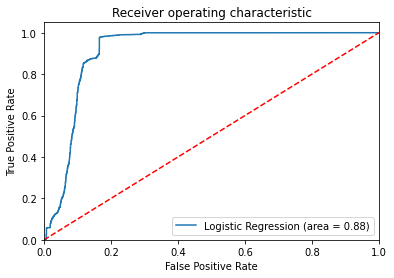

In [200]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [286]:
results = pd.concat([X_test,pd.DataFrame(data={'predictions': y_pred, 'actual': y_test})], axis = 1)
results.head(10)

,Brand_code,Variety_code,Style_code,year,Total Reviews,Average Rate,predictions,actual
4802,317,727,4,2012,1,0.000000,0,0
11742,224,2103,5,2013,1,5.000000,1,1
11799,287,2250,5,2014,1,5.000000,1,1
13368,196,1670,5,2015,1,5.000000,1,1
7798,12,871,5,2015,1,4.000000,0,0
18770,319,1962,5,2015,1,5.000000,1,1
13540,232,1106,5,2015,1,4.783241,1,1
16337,265,1635,6,2014,1,5.000000,1,1
17659,185,1661,5,2014,1,5.000000,1,1
13386,217,1167,5,2013,1,5.000000,1,1


Now let's choose two random brands and try to predict their results for a new year not in the dataset: 2020

In [311]:
#First item chosen - might not win
results.head(1)

,Brand_code,Variety_code,Style_code,year,Total Reviews,Average Rate,predictions,actual
4802,317,727,4,2012,1,0.0,0,0


In [296]:
#Second item chosen - won the top ten before, has a good average rate
df_codes = df_final[['Brand','Brand_code','Variety','Variety_code','Style','Style_code','Total Reviews','Average Rate','isTopTen']].drop_duplicates()
df_codes[df_codes['isTopTen'] == 1].sort_values(by = 'Variety_code', ascending = False).head(1)

,Brand,Brand_code,Variety,Variety_code,Style,Style_code,Total Reviews,Average Rate,isTopTen
11719,Nissin,208,Yakisoba Noodles Karashi,2532,Tray,7,1,5.0,1


Create the new dataset with the two rows:

In [297]:
import numpy as np
new1 = np.concatenate ([[317],[727],[4],[2020],[1],[0.0]])
new2 = np.concatenate ([[208],[2532],[7],[2020],[1],[5.0]])
test1 = pd.DataFrame(new1,index = x_columns)
test2 = pd.DataFrame(new2,index = x_columns)
test = pd.concat([test1,test2], axis=1)
test = test.T
test.year = test.year.astype(int)
test['Total Reviews'] = test['Total Reviews'].astype(int)
test.Brand_code = test.Brand_code.astype(int)
test.Variety_code = test.Variety_code.astype(int)
test.Style_code = test.Style_code.astype(int)
test = test.reset_index(drop = True)
test

,Brand_code,Variety_code,Style_code,year,Total Reviews,Average Rate
0,317,727,4,2020,1,0.0
1,208,2532,7,2020,1,5.0


The prediction below shows that the first row is an item that might not win the Top 10 in 2020, and the second item might win the Top 10 in 2020, as expected.

In [298]:
pred = logreg.predict(test)
pred

array([0, 1])

In [299]:
res_test = pd.concat([test,pd.DataFrame(data={'predictions': pred})], axis = 1)
res_test.head(10)

,Brand_code,Variety_code,Style_code,year,Total Reviews,Average Rate,predictions
0,317,727,4,2020,1,0.0,0
1,208,2532,7,2020,1,5.0,1


At last, let's pull again the codes of the items, to know the names of the brands, since we are predicting based on the codes of the brand, variety and style:

In [308]:
df_codes = df_final[['Brand','Brand_code','Variety','Variety_code','Style','Style_code']].drop_duplicates()
df_codes.head()

,Brand,Brand_code,Variety,Variety_code,Style,Style_code
0,Nissin,208,Cup Noodles Tom Yum Goong Flavour Potato Chips,554,Pack,5
5,Maruchan,172,Bariuma Goboten Udon,142,Bowl,1
10,MyKuali,196,Penang Red Tom Yum Goong Noodle (2018 Recipe),1677,Pack,5
15,Nissin,208,Cup Noodles Kyushu White Flavour (Open Sesame),497,Cup,4
20,Ve Wong,350,Fried Noodles With Mexican Chili Flavor,750,Pack,5


Our final result, with the name of the brands and the column with the predictions for 2020:

In [310]:
res_final = pd.merge(res_test, df_codes, on = ['Brand_code','Variety_code','Style_code'], how = 'left')
res_final

,Brand_code,Variety_code,Style_code,year,Total Reviews,Average Rate,predictions,Brand,Variety,Style
0,317,727,4,2020,1,0.0,0,Tesco,Everyday Value Chicken & Mushroom Flavour,Cup
1,208,2532,7,2020,1,5.0,1,Nissin,Yakisoba Noodles Karashi,Tray
